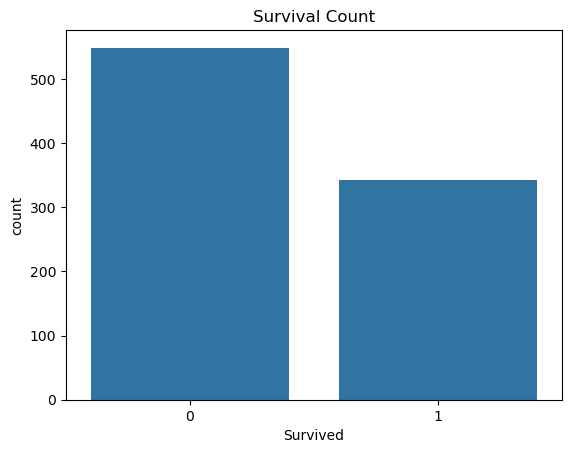


Valores nulos en el dataset:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


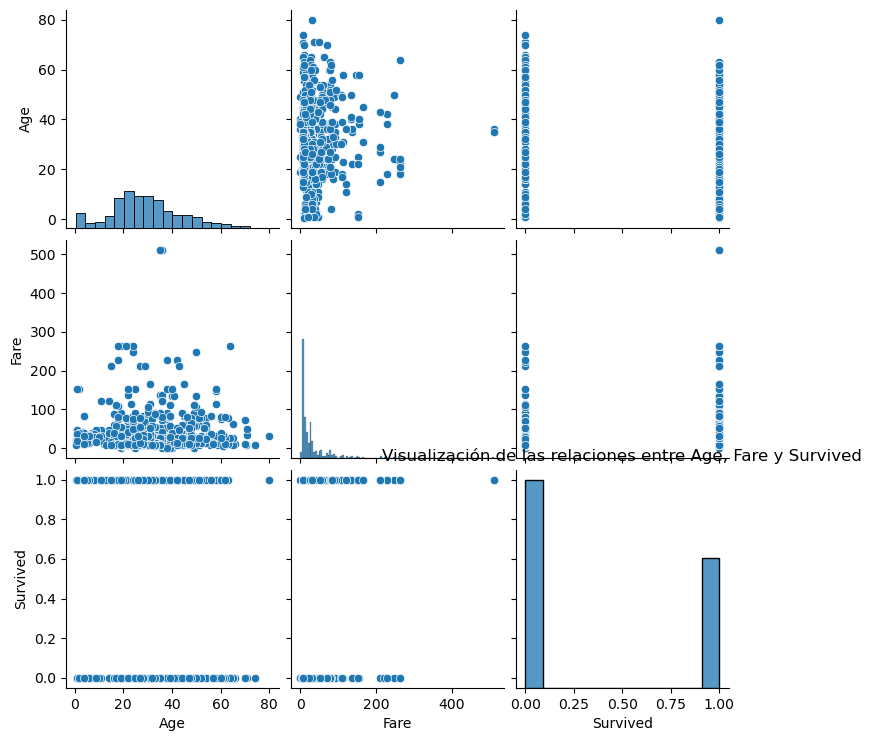

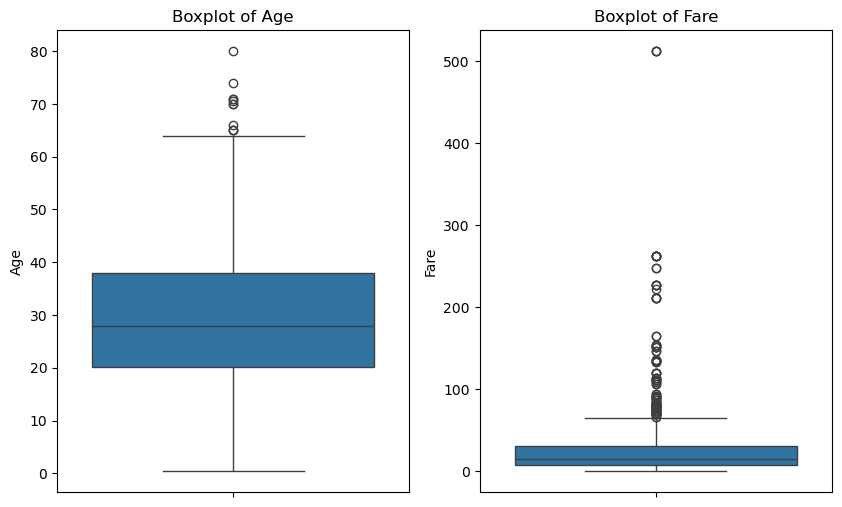

Mejores hiperparámetros: {'fit_intercept': True}
Mean Squared Error: 0.20406483761800062
R2 Score: 0.09919520279216232


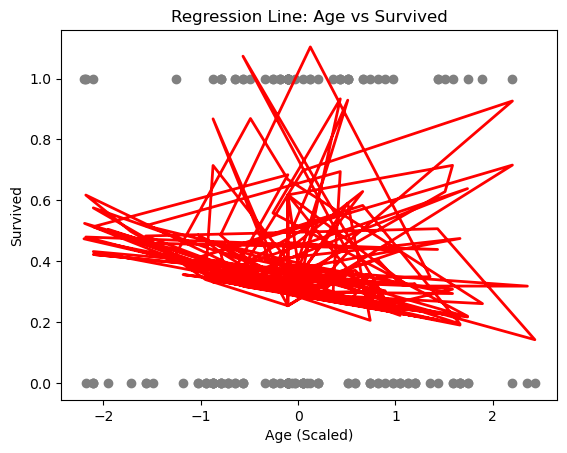

Visualización de Resultados Obtenidos
   Actual  Predicted
0       1   0.339257
1       0   0.617978
2       1   0.698024
3       1   0.926389
4       1   0.294250
5       1   0.317861
6       0   0.219932
7       0   0.317861
8       0   0.232523
9       1   1.073750


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from scipy import stats

# Cargar el dataset
titanic_data = pd.read_csv('Titanic-Dataset.csv')

# Visualización de la distribución de supervivientes
sns.countplot(x='Survived', data=titanic_data)
plt.title('Survival Count')
plt.show()

# Comprobar valores nulos en el dataset
print("\nValores nulos en el dataset:")
print(titanic_data.isnull().sum())

# Visualización de las relaciones entre 'Age', 'Fare' y 'Survived'
sns.pairplot(titanic_data[['Age', 'Fare', 'Survived']])
# plt.title('Pairplot of Age, Fare, and Survived')
plt.title('Visualización de las relaciones entre Age, Fare y Survived')
plt.show()

# Visualización de los diagramas de caja para 'Age' y 'Fare'
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y='Age', data=titanic_data)
plt.title('Boxplot of Age')
plt.subplot(1, 2, 2)
sns.boxplot(y='Fare', data=titanic_data)
plt.title('Boxplot of Fare')
plt.show()

# 2. Preprocesamiento de datos
# Rellenar valores nulos en 'Age' y 'Fare'
titanic_data['Age'] = titanic_data['Age'].fillna(titanic_data['Age'].median())
titanic_data['Fare'] = titanic_data['Fare'].fillna(titanic_data['Fare'].median())

# Mapear los valores de la columna 'Sex' a valores numéricos
titanic_data['Sex'] = titanic_data['Sex'].map({'male': 0, 'female': 1})

# Estandarizar las columnas 'Age' y 'Fare'
scaler = StandardScaler()
titanic_data[['Age_scaled', 'Fare_scaled']] = scaler.fit_transform(titanic_data[['Age', 'Fare']])

# Filtrar valores atípicos usando Z-scores
z_scores = np.abs(stats.zscore(titanic_data[['Age_scaled', 'Fare_scaled']]))
titanic_data_filtered = titanic_data[(z_scores < 3).all(axis=1)]




# 3. Selección de características con SelectKBest
selector = SelectKBest(score_func=f_classif, k=2)
X_selected = selector.fit_transform(titanic_data_filtered[['Age_scaled', 'Fare_scaled']], titanic_data_filtered['Survived'])



# 4. Dividir los datos en conjunto de entrenamiento y prueba
X = titanic_data_filtered[['Age_scaled', 'Fare_scaled']]
y = titanic_data_filtered['Survived']

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=0)




# 5. Modelo de regresión lineal - Entrenar el modelo configurando los diferentes hiperparámetros
regression_model = LinearRegression()

# Búsqueda de hiperparámetros con GridSearchCV
param_grid = {'fit_intercept': [True, False]}
grid_search = GridSearchCV(regression_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Resultados del mejor modelo
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)


# 6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2}')



# 7. Visualización de los resultados
plt.scatter(X_test[:, 0], y_test, color='gray')
plt.plot(X_test[:, 0], y_pred, color='red', linewidth=2)
plt.xlabel('Age (Scaled)')
plt.ylabel('Survived')
plt.title('Regression Line: Age vs Survived')
plt.show()

# Mostrar los resultados 
print("Visualización de Resultados Obtenidos")
results_df = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
print(results_df.head(10))
